# **RICE LEAF DISEASE DETECTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Importing required library

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [194]:
IMAGE_SIZE = 255
BATCH_SIZE = 10
CHANNELS = 3
EPOCHS = 20

In [155]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Rice Leaf Detection/Data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 119 files belonging to 3 classes.


In [156]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [157]:
len(dataset)

12

In [158]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)

(10, 255, 255, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 1, 0, 0, 0, 1, 2, 2, 0, 2], dtype=int32)>>


In [159]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[239.74118 232.74118 226.74118]
  [239.62354 231.88235 228.10588]
  [240.      232.5232  227.95364]
  ...
  [236.70605 227.70605 220.70605]
  [236.46214 226.46214 217.46214]
  [237.59883 226.85765 220.08118]]

 [[239.      232.      226.     ]
  [240.17648 233.17648 227.17648]
  [240.70589 232.70589 229.70589]
  ...
  [236.77647 227.77647 220.77647]
  [235.62354 224.62354 218.62354]
  [237.      227.      218.     ]]

 [[239.      232.      224.     ]
  [239.      232.      226.     ]
  [239.9135  231.9135  228.9135 ]
  ...
  [236.29395 227.29395 220.29395]
  [236.1834  225.1834  221.1834 ]
  [240.      227.      219.     ]]

 ...

 [[239.13495 232.13495 226.13495]
  [238.      233.      229.     ]
  [238.      235.      230.     ]
  ...
  [237.70929 227.70929 218.70929]
  [237.70587 228.70587 221.70587]
  [237.      228.      219.     ]]

 [[239.      232.      225.75809]
  [240.      232.      229.08414]
  [239.13148 233.93427 230.15778]
  ...
  [238.      228.      219.     ]
  [2

In [160]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0].shape)

(255, 255, 3)


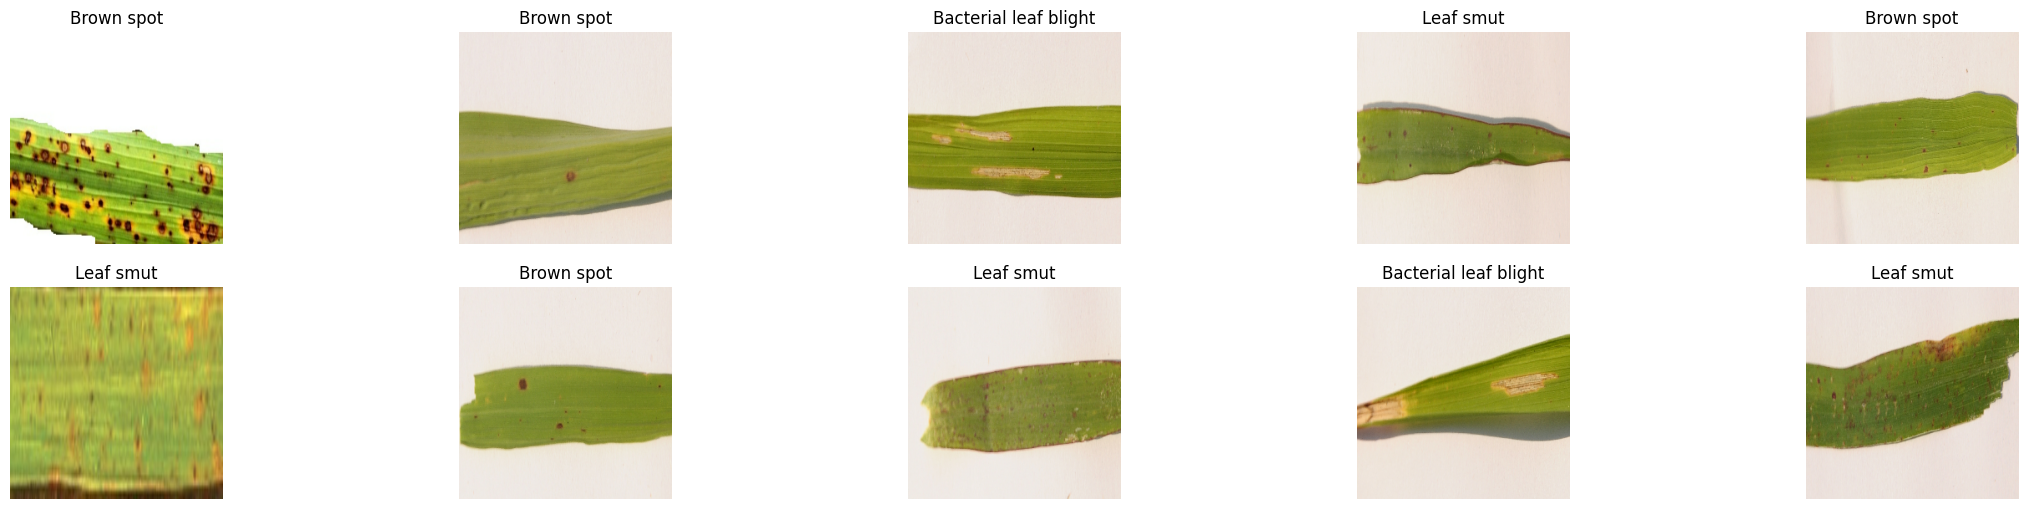

In [193]:
plt.figure(figsize=(28,16))
for image_batch,label_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [161]:

    print("Number of images in batch:", len(image_batch))  # Diagnostic check

    # Determine the number of images to display
    num_images = min(len(image_batch), 40)

Number of images in batch: 10


In [162]:
train_size = 0.8
len(dataset)*train_size


9.600000000000001

In [163]:
train_ds = dataset.take(9)
len(train_ds)

9

In [164]:
test_ds = dataset.skip(9)
len(test_ds)

3

In [165]:
val_size = 0.1
len(dataset)*val_size

1.2000000000000002

In [166]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [167]:
test_ds = test_ds.skip(1)
len(test_ds)

2

In [168]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(list(ds))  # Convert to a list to get the size

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [169]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [170]:
len(train_ds)

9

In [171]:
len(val_ds)

1

In [172]:
len(test_ds)

2

In [173]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [174]:
from tensorflow.keras import Sequential
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255),
])


In [175]:
data_augmentatiion = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [176]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
   resize_and_rescale,
   data_augmentatiion,
   layers.Conv2D(32,(3,3),activation= 'relu', input_shape = input_shape),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,kernel_size=(3,3),activation= 'relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,kernel_size=(3,3),activation= 'relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,kernel_size=(3,3),activation= 'relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,kernel_size=(3,3),activation= 'relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64,kernel_size=(3,3),activation= 'relu'),
   layers.MaxPooling2D((2,2)),
   layers.Flatten(),
   layers.Dense(64, activation='relu'),
   layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [177]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (10, 255, 255, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_15 (Sequential)           │ (10, 255, 255, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (10, 253, 253, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (10, 126, 126, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (10, 124, 124, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (10, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (10, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (10, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (10, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (10, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (10, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (10, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (10, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (10, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (10, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (10, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (10, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [180]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)


9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6868 - loss: 0.7297 - val_accuracy: 0.9000 - val_loss: 0.4618
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7033 - loss: 0.7732 - val_accuracy: 1.0000 - val_loss: 0.5335
Epoch 17/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6855 - loss: 0.7304 - val_accuracy: 0.8000 - val_loss: 0.7363
Epoch 18/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6279 - loss: 0.8914 - val_accuracy: 1.0000 - val_loss: 0.5439
Epoch 19/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6423 - loss: 0.8215 - val_accuracy: 1.0000 - val_loss: 0.4536
Epoch 20/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6941 - loss: 0.7197 - val_accuracy: 0.9000 - val_loss: 0.5014
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7179 - loss: 0.7025 - val_accuracy: 0.9000 - val_loss: 0.4513
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7417 - loss: 0.6346 - val_accuracy: 0.9000 - val_loss: 0.3667
Epoch 3/20
9/9

In [181]:
scores = model.evaluate(test_ds,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 795ms/step - accuracy: 0.8000 - loss: 0.5675


In [182]:
print("Number of elements in test_ds:", len(list(test_ds)))

Number of elements in test_ds: 2


In [183]:
scores

[0.776076078414917, 0.699999988079071]

In [184]:
history

In [185]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 9}

In [186]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [187]:
history.history['accuracy']

[0.7191011309623718,
 0.7191011309623718,
 0.6629213690757751,
 0.7191011309623718,
 0.7303370833396912,
 0.7415730357170105,
 0.7191011309623718,
 0.6853932738304138,
 0.7303370833396912,
 0.7752808928489685,
 0.7078651785850525,
 0.7191011309623718,
 0.7303370833396912,
 0.7528089880943298,
 0.7303370833396912,
 0.7191011309623718,
 0.7191011309623718,
 0.7415730357170105,
 0.6966292262077332,
 0.7415730357170105]

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

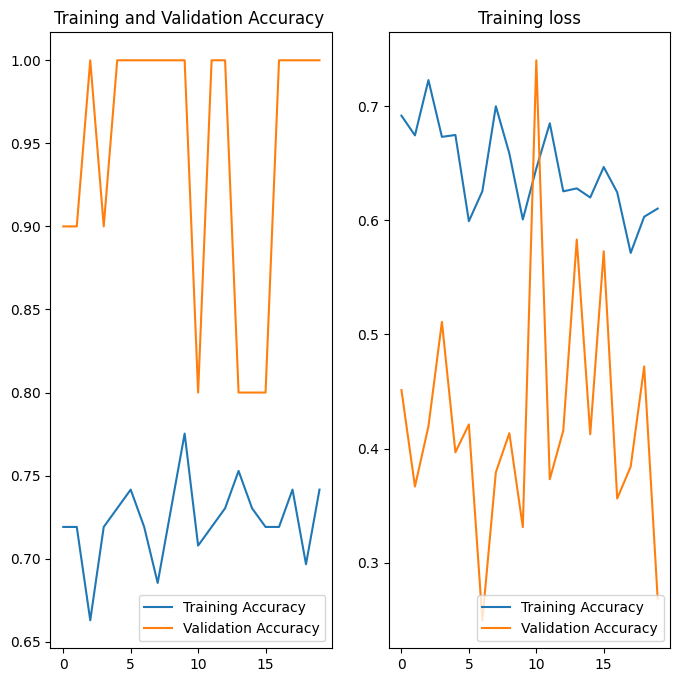

In [189]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label ="Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy ")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ="Training Accuracy")
plt.plot(range(EPOCHS), val_loss, label ="Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training loss")
plt.show()

first image to predict
actual label : Brown spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
predicted label: Brown spot


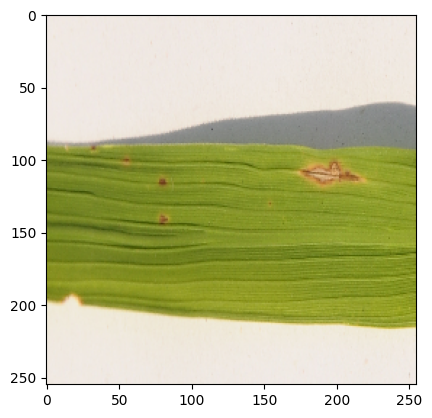

In [190]:
for images_batch,labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label :", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [191]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidience = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidience

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


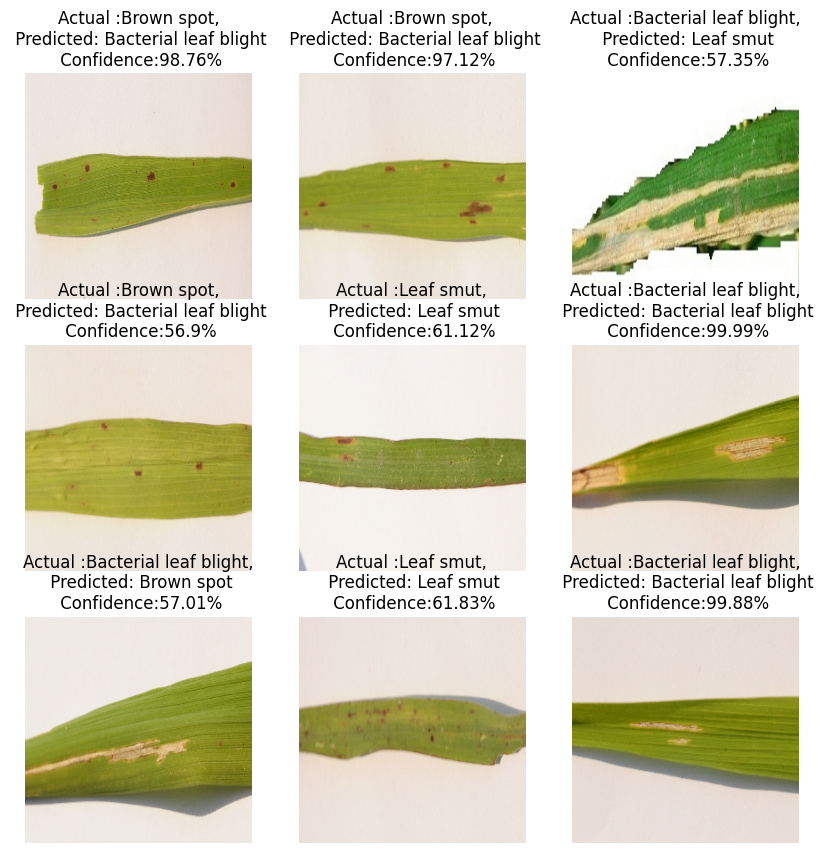

In [192]:
plt.figure(figsize=(10,10))
for images,labels in  test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual :{actual_class},\n Predicted: {predicted_class}\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:
# For saving the model
model_save_path = '/content/drive/MyDrive/Rice Leaf Detection/model.keras'
model.save(model_save_path)


In [ ]:
import os

# Define the directory for saving models
model_dir = "/content/drive/MyDrive/Rice Leaf Detection/models"
os.makedirs(model_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Get the latest model version
model_version = max([int(i.split(".")[0]) for i in os.listdir(model_dir) if i.split(".")[0].isdigit()] + [0]) + 1

# Save the model with the new version number
model_save_path = f"{model_dir}/model_v{model_version}.keras"
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")


Model saved to: /content/drive/MyDrive/Rice Leaf Detection/models/model_v1.keras


## **Conclusion**

- This Rice Leaf Detection project shows that adjusting training parameters—such as the number of epochs and batch size can significantly enhance model performance. This efficiency makes the model more accessible and feasible for practical use.

- Despite the dataset’s limited size, which restricts achieving very high accuracy (90% or above), iterative fine-tuning allowed us to reach an accuracy of up to 80%. This level is encouraging and can help farmers detect infections early, allowing them to act quickly to protect their crops.